In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [246]:
# Define the relative path to the CSV file
pkm_gdp_file_path = '../data/volume of passenger transport relative to GDP(pkm divided by gdp) - tran_hv_pstra.csv'

# Read the CSV file
pkm_gdp_data = pd.read_csv(pkm_gdp_file_path)

# Convert to DataFrame
pkm_gdp_df = pd.DataFrame(pkm_gdp_data)

In [247]:
# Extracting country codes by splitting the 'unit,geo\\time' column and selecting the second part
pkm_gdp_df['country'] = pkm_gdp_df['unit,geo\\time'].str.split(',').str[1]

# Exclude specific geographical entities
excluded_geos = ['EU27_2020', 'EU28']
pkm_gdp_df = pkm_gdp_df[~pkm_gdp_df['country'].isin(excluded_geos)]

# Drop 'unit,geo\\time' column
pkm_gdp_df.drop('unit,geo\\time', axis=1, inplace=True)

# Set 'country' as the index
pkm_gdp_df.set_index('country', inplace=True)

# Replace ":" with NaN and remove ' p', ' e', or ' ep' from entries
pkm_gdp_df.replace({":": np.nan, " p": "", " e": "", " ep": ""}, regex=True, inplace=True)

# Convert the data to float
for col in pkm_gdp_df.columns:
    pkm_gdp_df[col] = pd.to_numeric(pkm_gdp_df[col], errors='coerce')

# Display the first few rows of the DataFrame
pkm_gdp_df.head()

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
country,,,,,,,,,,,,,,,,,,,,,
AT,80.0,78.6,87.5,NaN,100.2,100.8,100,99.0,97.4,96.1,...,105.0,107.0,109.6,112.8,114.1,NaN,NaN,NaN,NaN,NaN
BE,NaN,NaN,93.8,95.5,96.6,97.4,100,NaN,111.5,NaN,...,122.7,124.6,124.4,126.9,128.9,NaN,NaN,NaN,NaN,NaN
BG,72.3,75.4,88.7,89.7,93.9,95.9,100,99.1,94.4,91.9,...,95.6,91.0,95.2,82.6,92.2,NaN,NaN,NaN,NaN,NaN
CH,86.7,86.0,97.5,97.1,99.6,99.8,100,100.7,101.9,102.9,...,120.5,120.8,120.4,122.0,120.8,123.0,128.3,131.0,133.9,128.4
CY,76.3,75.5,90.1,92.4,94.2,97.9,100,100.4,96.8,91.1,...,86.9,89.0,92.3,92.5,90.7,NaN,NaN,NaN,NaN,NaN


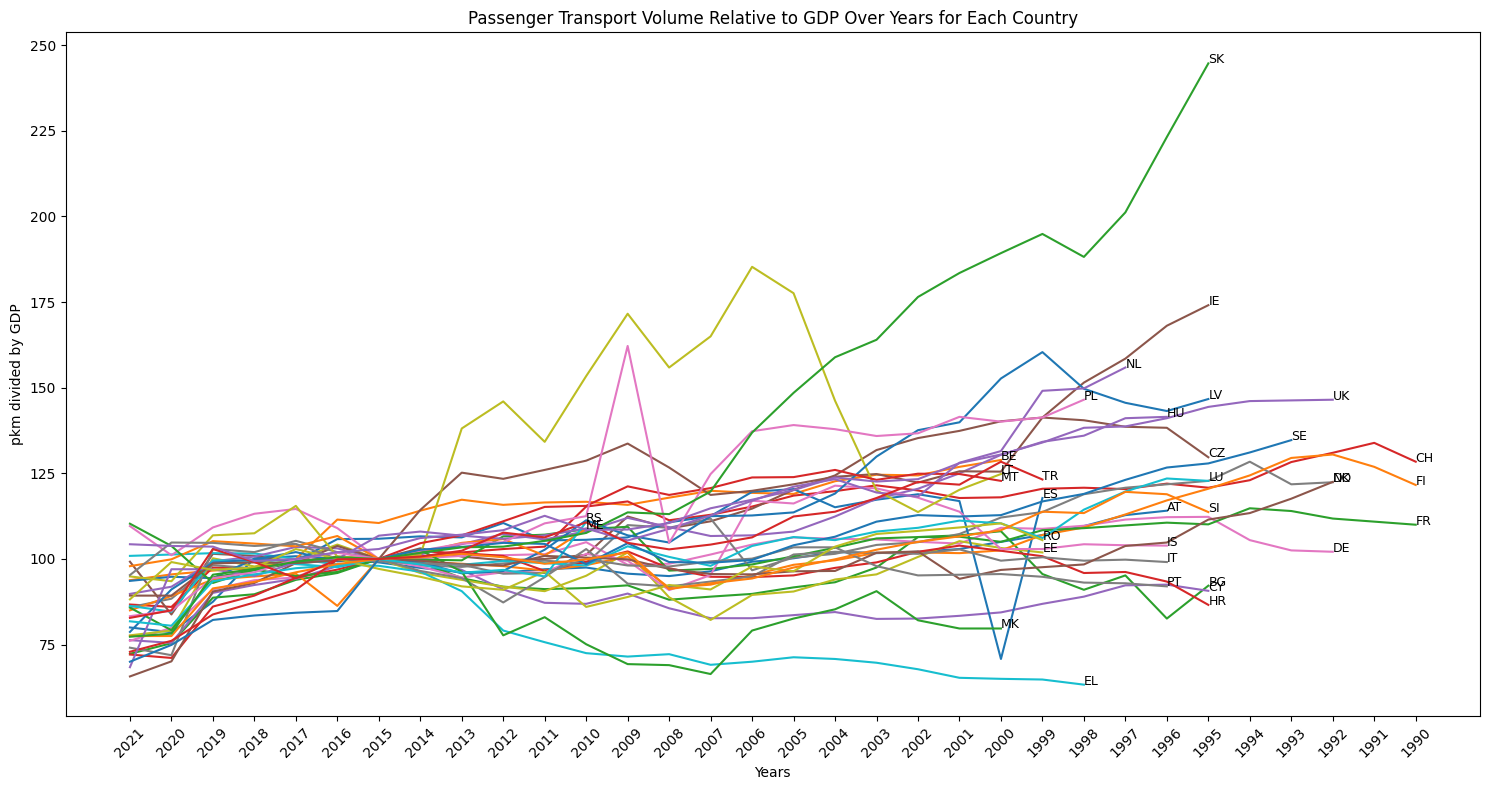

In [248]:
# Function to plot data with country code labels on each line
def plot_data_with_labels(df, title):
    plt.figure(figsize=(15, 8))

    # Convert the column names (years) to strings
    year_columns = df.columns.astype(str)

    # Loop through each country and plot its data
    for country in df.index:
        # Ensure the data is in a float format for plotting and drop NaN values
        country_data = df.loc[country].astype(float).dropna()
        if not country_data.empty:
            plt.plot(year_columns[:len(country_data)], country_data, label=country)
            # Add text label near the last point of each line
            last_year = year_columns[len(country_data) - 1]
            last_value = country_data.iloc[-1]
            plt.text(last_year, last_value, country, fontsize=9)

    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel('pkm divided by GDP')
    plt.xlabel('Years')
    plt.tight_layout()
    plt.show()

# Plotting Passenger Transport Volume Relative to GDP (pkm divided by GDP) with country labels
plot_data_with_labels(pkm_gdp_df, 'Passenger Transport Volume Relative to GDP Over Years for Each Country')

In [249]:
# Define the relative path to the CSV file
rail_passengers_file_path = '../data/number of rail passengers transported - rail_pa_total.csv'

# Read the CSV file
rail_passengers_data = pd.read_csv(rail_passengers_file_path)

# Convert to DataFrame
rail_passengers_df = pd.DataFrame(rail_passengers_data)

In [250]:
# Split 'unit,geo\\time' into 'unit' and 'country'
rail_passengers_df[['unit', 'country']] = rail_passengers_df['unit,geo\\time'].str.split(',', expand=True)
rail_passengers_df.drop('unit,geo\\time', axis=1, inplace=True)

# Replace ": c", ":", " :", ": ", ": p", and any trailing non-numeric characters (like " p") from data columns only
for col in rail_passengers_df.columns.drop(['unit', 'country']):
    rail_passengers_df[col] = rail_passengers_df[col].replace({": c": np.nan, ":": np.nan, " :": np.nan, ": ": np.nan, ": p": np.nan}, inplace=False)
    rail_passengers_df[col] = rail_passengers_df[col].replace(to_replace=r'[^\d.]+', value='', regex=True)

# Convert the column names (representing years) to strings
rail_passengers_df.columns = rail_passengers_df.columns.astype(str)

# Filter out EU27_2007 and EU27_2020
rail_passengers_df = rail_passengers_df[~rail_passengers_df['country'].isin(['EU27_2007', 'EU27_2020', 'EU28'])]

# Create the dataframe
df_mio_pkm = rail_passengers_df[rail_passengers_df['unit'] == 'MIO_PKM'].drop('unit', axis=1).set_index('country')

# Display the DataFrame
print("Million Passenger Kilometers (MIO_PKM):")
display(df_mio_pkm.head())


Million Passenger Kilometers (MIO_PKM):


,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
country,,,,,,,,,,,,,,,,,,,
AT,12855,8447,7375,13252,13122,12562,12497,12104,11981,11804,11211,10778,10263,10184,10365,9167,8907,8685,8274
BA,31,18,14,56,39,29,24,34,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10669,10498,10237,10139,9403,8964,8510,9225
BG,1600,1203,1118,1520,1476,1434,1455,1549,1698,1821,1870,2059,2090,2138,2317,2404,2411,NaN,NaN
CH,19201,14223,13261,21559,20451,20707,20657,20228,19934,19368,19180,19387,19093,18497,17699,NaN,NaN,NaN,NaN


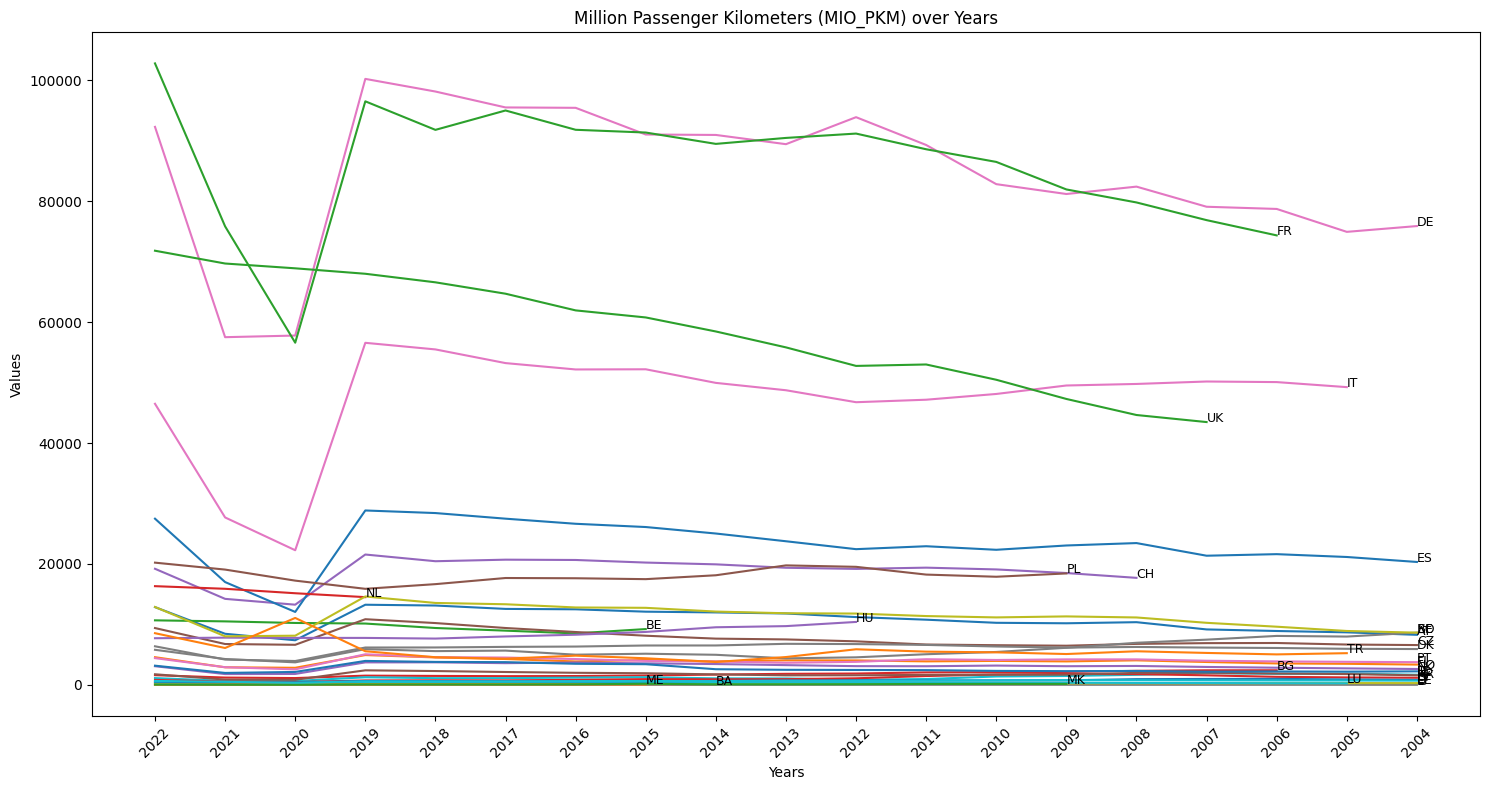

In [251]:
plt.figure(figsize=(15, 8))

# Convert the column names (years) to strings
year_columns = df_mio_pkm.columns.astype(str)

# Loop through each country and plot its data with country codes on the lines
for country in df_mio_pkm.index:
    # Ensure the data is in a float format for plotting and drop NaN values
    country_data = df_mio_pkm.loc[country].astype(float).dropna()
    if not country_data.empty:
        plt.plot(year_columns[:len(country_data)], country_data)
        # Add text label near the last point of each line
        last_year = year_columns[len(country_data) - 1]
        last_value = country_data.iloc[-1]
        plt.text(last_year, last_value, country, fontsize=9)

plt.title('Million Passenger Kilometers (MIO_PKM) over Years')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.xlabel('Years')
plt.tight_layout()
plt.show()


In [252]:
# Define the relative path to the CSV file
modal_split_file_path = '../data/modal split percentage of inland passenger transport - tran_hv_psmod.csv'

# Read the CSV file
modal_split_data = pd.read_csv(modal_split_file_path)

# Convert to DataFrame
modal_split_df = pd.DataFrame(modal_split_data)

In [253]:
# Split 'unit,vehicle,geo\\time' into separate columns for 'unit', 'vehicle', and 'country'
modal_split_df[['unit', 'vehicle', 'country']] = modal_split_df['unit,vehicle,geo\\time'].str.split(',', expand=True)
modal_split_df.drop('unit,vehicle,geo\\time', axis=1, inplace=True)

# Replace various forms of NaN representations
nan_values = {": c": np.nan, ":": np.nan, " :": np.nan, ": ": np.nan, ": p": np.nan}
modal_split_df.replace(nan_values, inplace=True)

# Exclude specific geographical entities
excluded_rows = ['EU27_2020', 'EU28', 'TRN_BUS_TOT_AVD']
modal_split_df = modal_split_df[~modal_split_df['country'].isin(excluded_rows)]

# Function to clean non-numeric suffixes and handle empty strings
def clean_data_suffixes(df):
    for col in df.columns:
        # Remove non-numeric suffixes and convert empty strings to NaN
        df[col] = df[col].replace(to_replace=r'[^\d.]+', value='', regex=True).replace('', np.nan).astype(float)
    return df

# Separate tables for BUS_TOT, CAR, and TRN, set 'country' as the index, and drop 'vehicle' and 'unit' columns
bus_df = modal_split_df[modal_split_df['vehicle'] == 'BUS_TOT'].drop(['unit', 'vehicle'], axis=1).set_index('country')
car_df = modal_split_df[modal_split_df['vehicle'] == 'CAR'].drop(['unit', 'vehicle'], axis=1).set_index('country')
trn_df = modal_split_df[modal_split_df['vehicle'] == 'TRN'].drop(['unit', 'vehicle'], axis=1).set_index('country')

# Clean the 'BUS', 'CAR', and 'TRN' DataFrames
bus_df_cleaned = clean_data_suffixes(bus_df.copy())
car_df_cleaned = clean_data_suffixes(car_df.copy())
trn_df_cleaned = clean_data_suffixes(trn_df.copy())

# Display the first few rows of each cleaned DataFrame
print("Bus Data:")
display(bus_df_cleaned.head())
print("\nCar Data:")
display(car_df_cleaned.head())
print("\nTrain Data:")
display(trn_df_cleaned.head())

Bus Data:


,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
country,,,,,,,,,,,,,,,,,,,,,
AT,9.0,9.3,9.7,9.5,10.0,9.9,9.9,9.9,9.9,10.0,...,10.7,10.9,10.9,10.7,10.9,10.6,10.7,10.5,10.6,11.0
BE,8.2,8.2,10.4,10.3,10.2,10.5,11.0,11.5,15.2,12.5,...,10.9,11.0,11.1,11.3,11.3,11.8,10.9,10.7,10.7,10.6
BG,8.0,8.6,13.0,12.0,13.1,14.1,14.6,15.1,14.0,14.8,...,21.9,24.5,24.0,25.3,29.3,NaN,NaN,NaN,NaN,NaN
CH,5.9,5.8,6.1,5.9,5.9,5.9,5.9,5.8,5.7,5.7,...,5.2,5.3,3.6,3.6,3.8,4.0,3.9,4.0,3.9,3.7
CY,12.7,12.6,18.5,18.9,19.0,18.6,18.7,18.2,18.5,18.7,...,22.1,22.3,22.6,22.9,22.7,NaN,NaN,NaN,NaN,NaN



Car Data:


,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
country,,,,,,,,,,,,,,,,,,,,,
AT,81.2,81.5,76.4,77.0,78.0,78.0,78.1,77.9,77.8,78.2,...,79.6,79.4,79.0,77.4,77.2,77.8,77.2,77.0,77.0,77.1
BE,85.6,85.0,81.4,81.7,82.0,81.9,81.5,81.0,77.8,80.6,...,83.1,83.1,83.0,82.9,82.9,82.6,83.3,83.3,83.3,83.3
BG,89.9,89.4,84.7,85.8,84.8,83.7,83.1,82.3,83.0,82.1,...,67.9,63.3,61.0,61.9,59.6,NaN,NaN,NaN,NaN,NaN
CH,79.5,79.9,73.9,74.8,74.5,74.3,74.4,74.6,75.0,75.0,...,81.0,81.1,82.5,82.5,82.3,79.8,80.9,81.4,81.1,82.1
CY,87.3,87.4,81.5,81.1,81.0,81.4,81.3,81.8,81.5,81.3,...,77.9,77.7,77.4,77.1,77.3,NaN,NaN,NaN,NaN,NaN



Train Data:


,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
country,,,,,,,,,,,,,,,,,,,,,
AT,9.8,9.2,13.9,13.5,12.0,12.1,12.1,12.2,12.3,11.8,...,9.6,9.8,10.1,11.9,12.0,11.6,12.1,12.5,12.4,11.9
BE,6.2,6.9,8.2,8.0,7.8,7.6,7.6,7.4,7.0,6.9,...,6.0,5.9,5.9,5.9,5.8,5.6,5.9,6.0,6.1,6.1
BG,2.1,2.0,2.2,2.2,2.1,2.2,2.3,2.6,2.9,3.1,...,10.2,12.2,15.0,12.8,11.2,NaN,NaN,NaN,NaN,NaN
CH,14.6,14.3,20.0,19.3,19.6,19.8,19.7,19.6,19.3,19.2,...,13.8,13.6,13.9,13.9,13.9,16.2,15.2,14.6,15.0,14.2
CY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


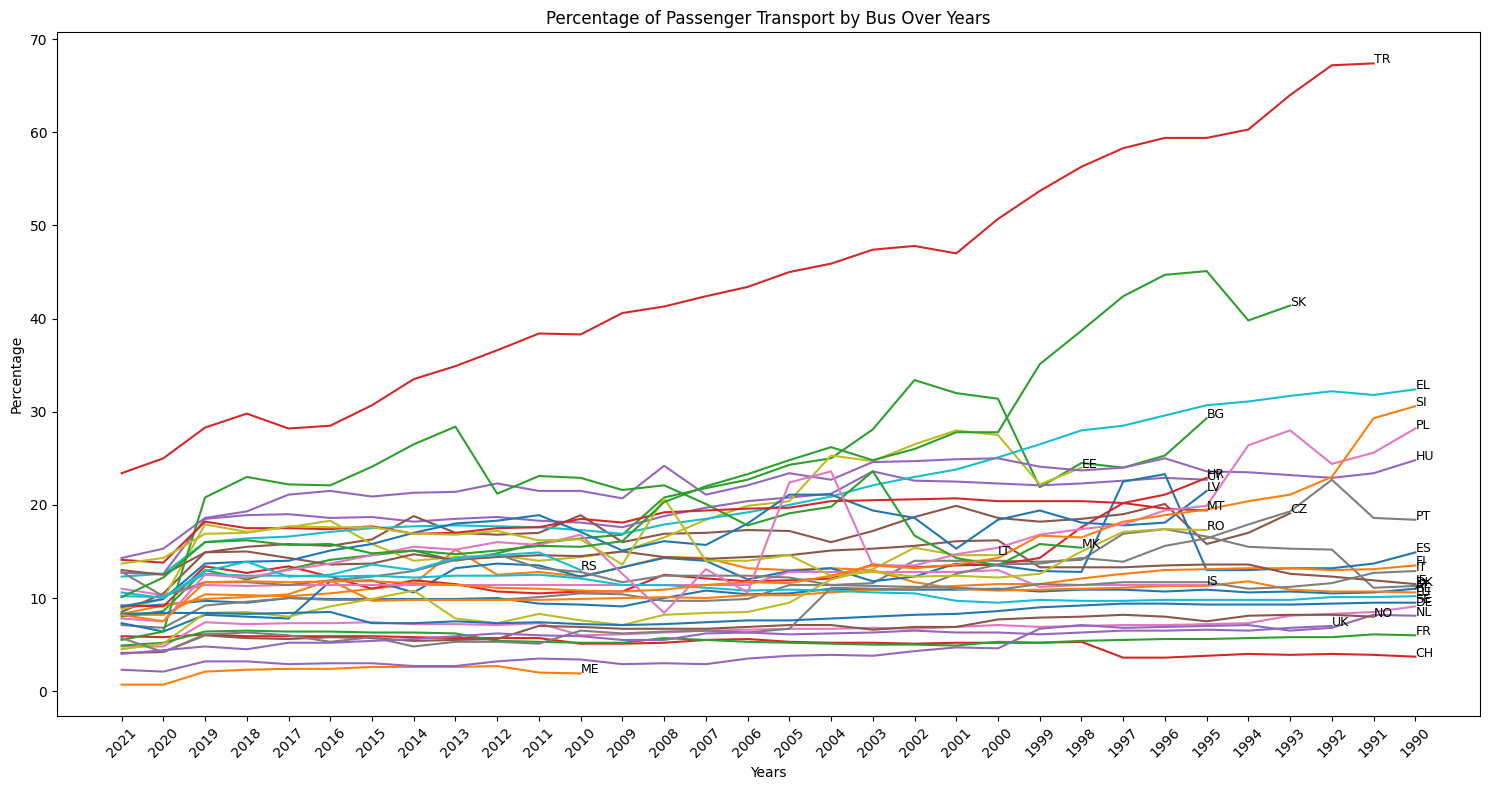

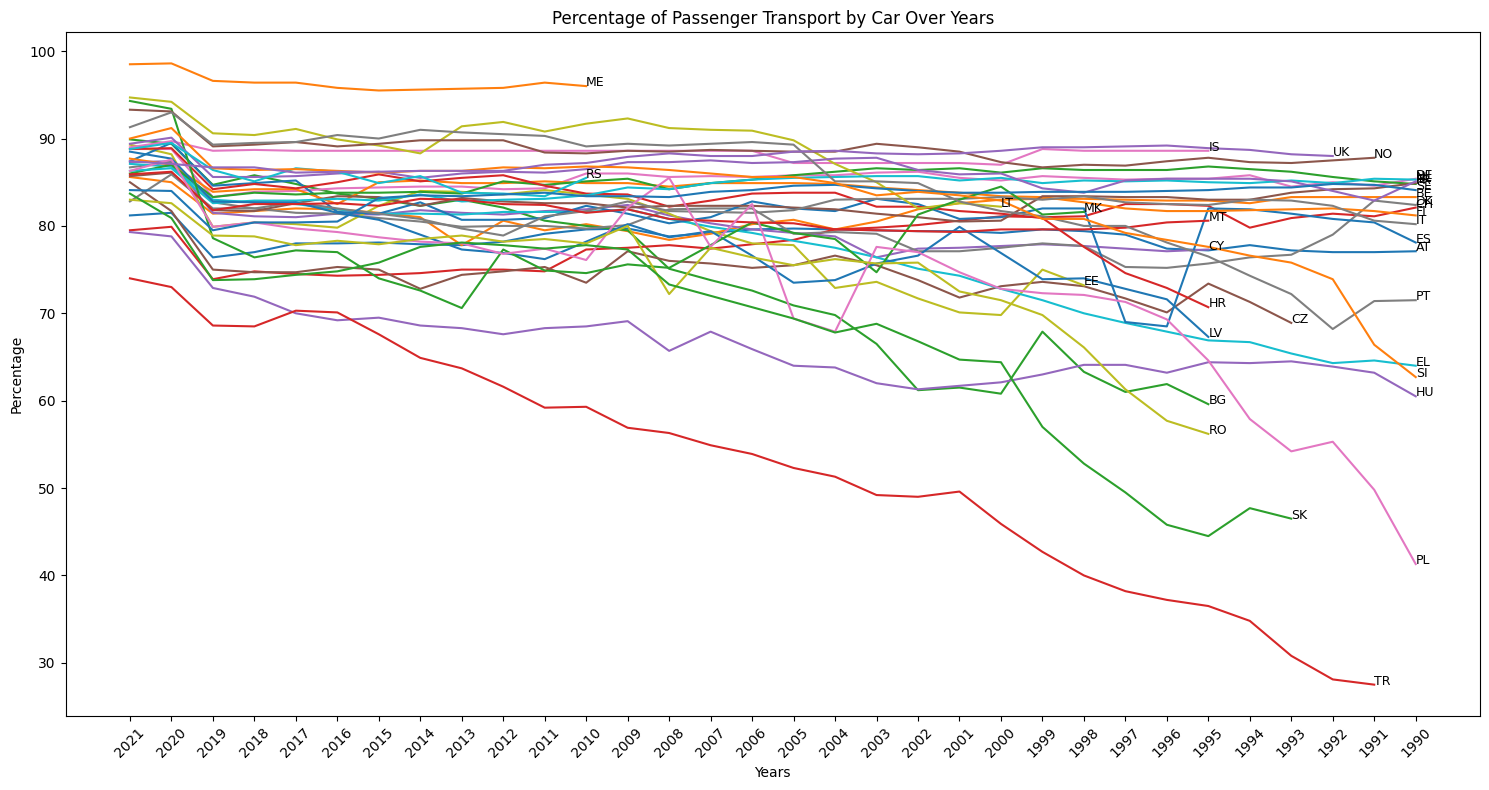

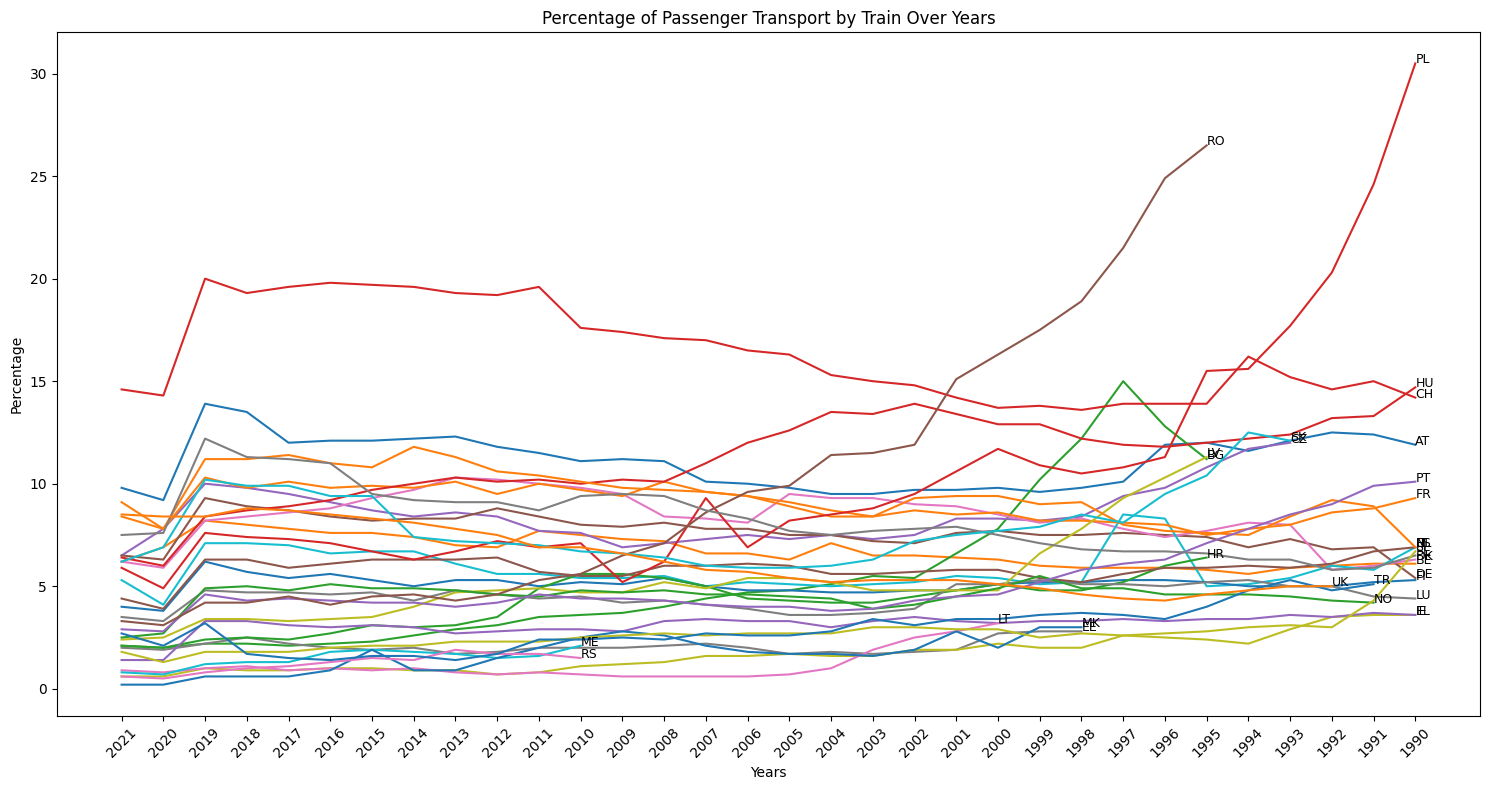

In [254]:
# Modified function to plot data with country code labels on each line, ensuring matching dimensions
def plot_data(df, title):
    plt.figure(figsize=(15, 8))

    # Convert the column names (years) to strings for the x-axis
    year_columns = df.columns.astype(str)

    # Loop through each country and plot its data with country codes on the lines
    for country in df.index:
        # Extract country data and align it with the year columns
        country_data = df.loc[country].reindex(year_columns).dropna()
        if not country_data.empty:
            plt.plot(year_columns[:len(country_data)], country_data)
            # Add text label near the last point of each line
            last_year = year_columns[len(country_data) - 1]
            last_value = country_data.iloc[-1]
            plt.text(last_year, last_value, country, fontsize=9)

    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel('Percentage')
    plt.xlabel('Years')
    plt.tight_layout()
    plt.show()

# Plotting Bus, Car, and Train Data with country labels
plot_data(bus_df_cleaned, 'Percentage of Passenger Transport by Bus Over Years')
plot_data(car_df_cleaned, 'Percentage of Passenger Transport by Car Over Years')
plot_data(trn_df_cleaned, 'Percentage of Passenger Transport by Train Over Years')


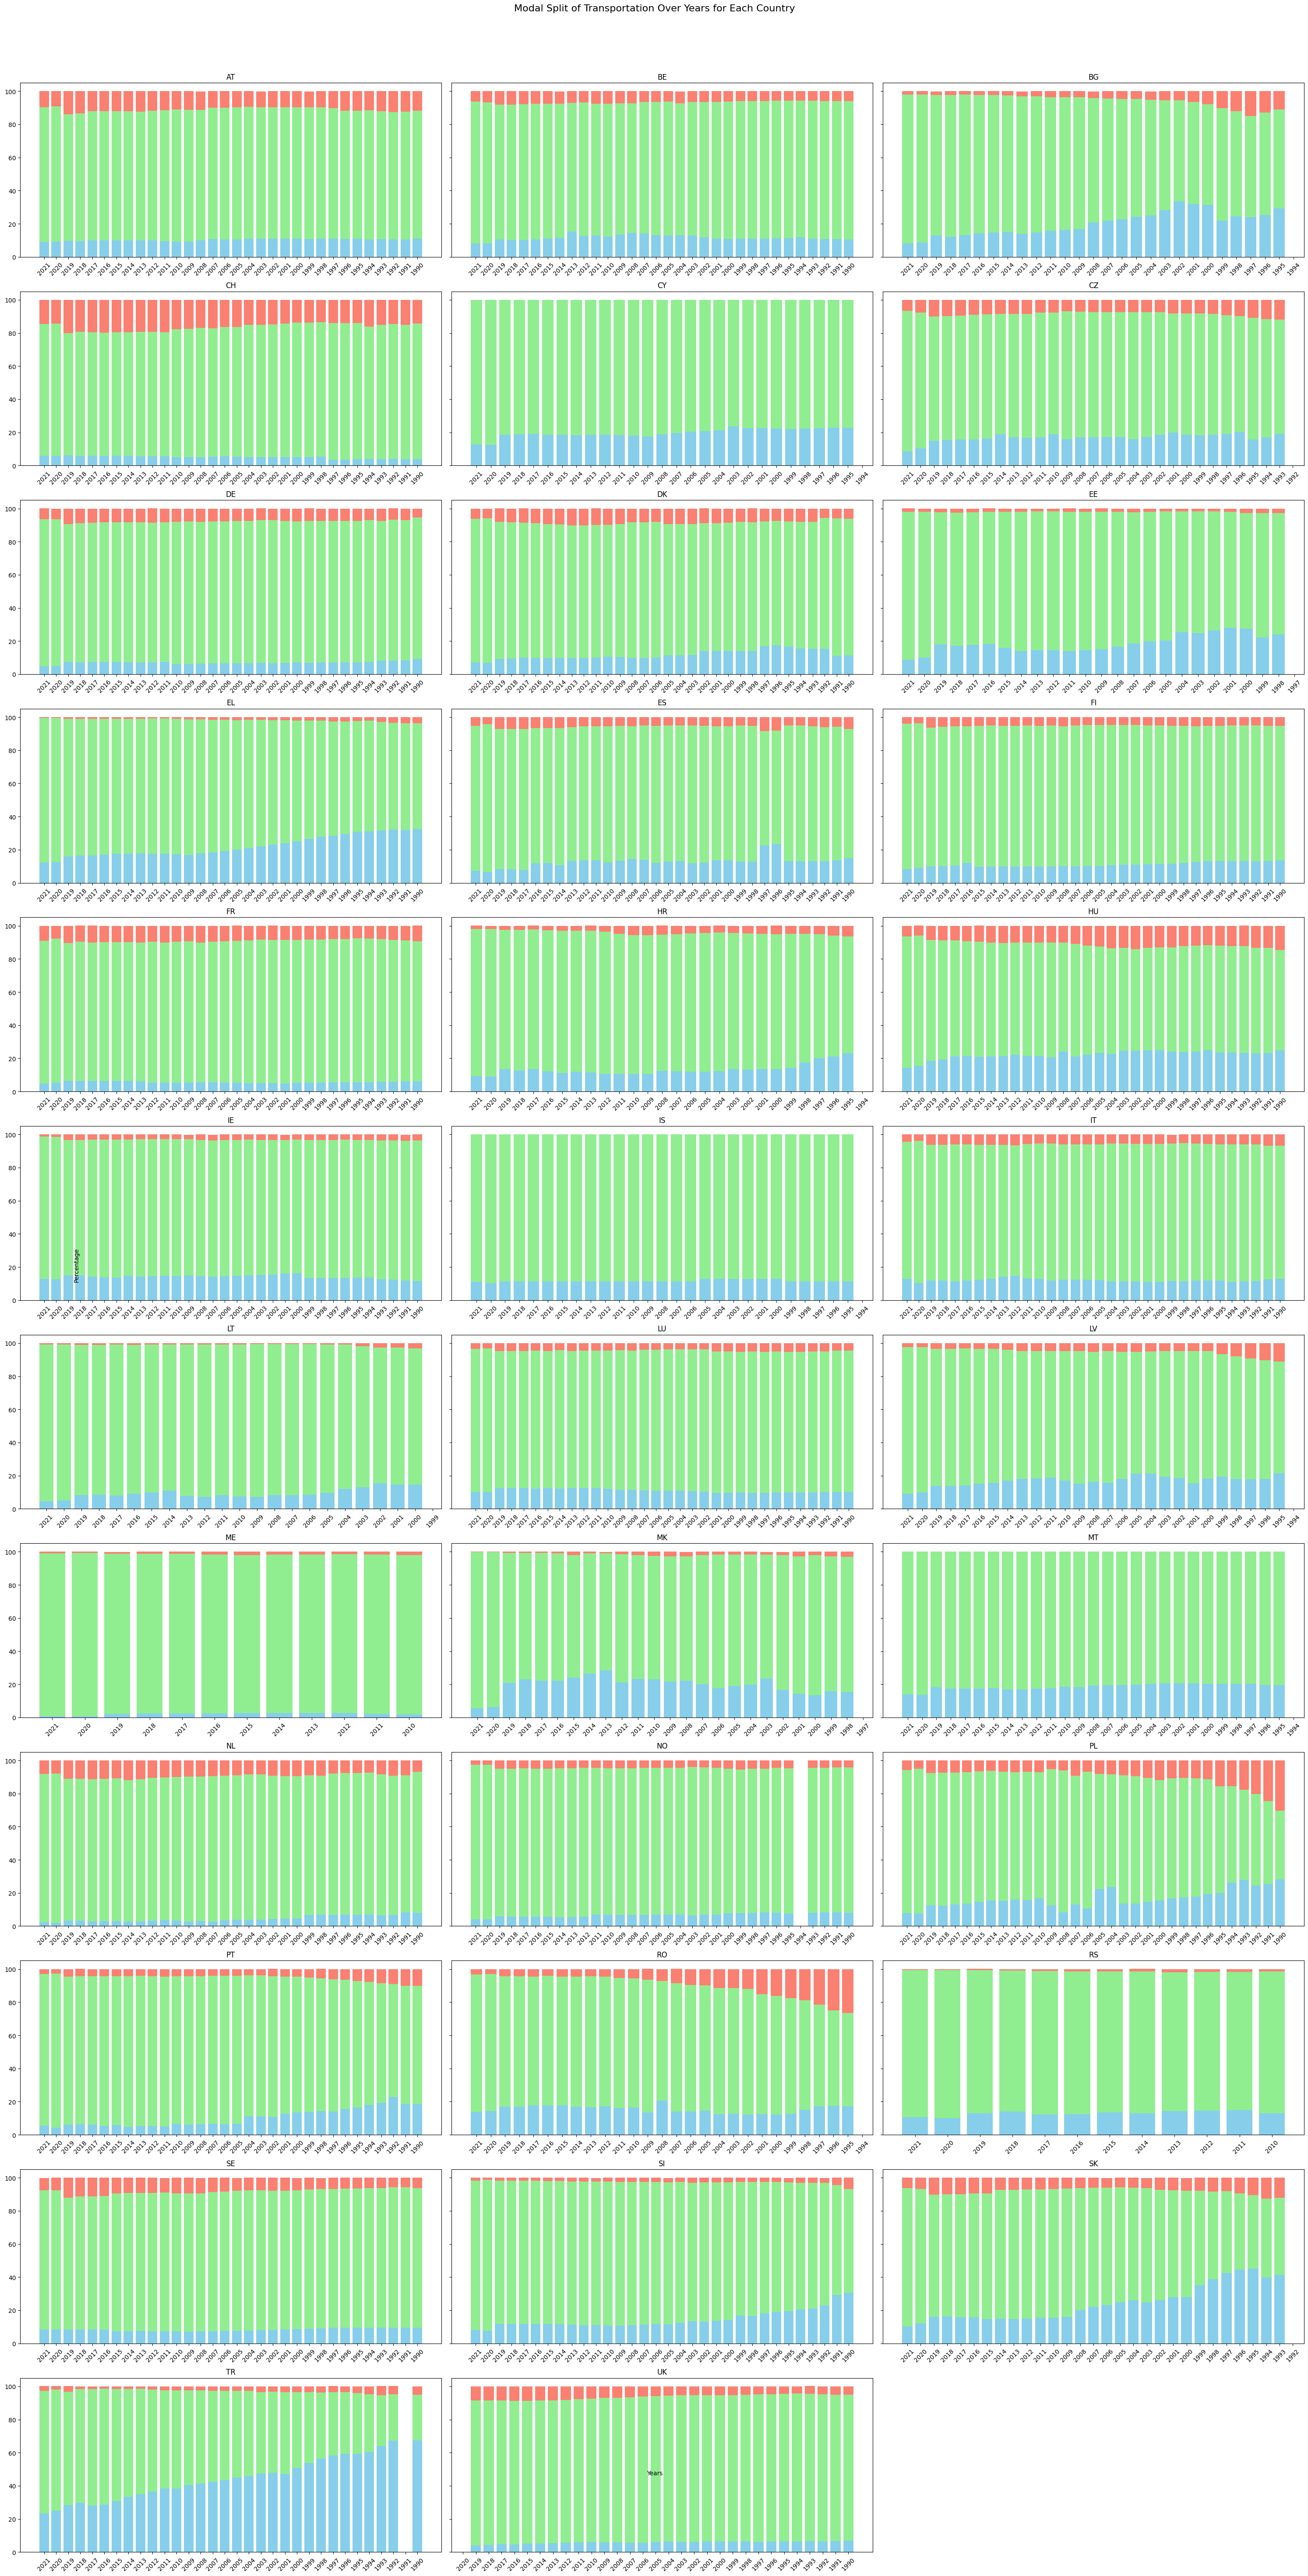

In [255]:
# Function to plot stacked bar plots for each country
def plot_stacked_bars_for_countries(bus_df, car_df, trn_df):
    # List of all countries
    countries = bus_df.index.unique()

    # Determine the grid size for subplots (fewer columns for more vertical spread)
    n_cols = 3  # Number of plots per row
    n_rows = -(-len(countries) // n_cols)  # Ceiling division for rows

    # Create figure and axes
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 5), sharey=True)

    # Flatten the axes array for easy iteration
    axs = axs.flatten()

    # Loop through each country and create a stacked bar plot
    for i, country in enumerate(countries):
        # Extract data for the selected country
        bus_data = bus_df.loc[country]
        car_data = car_df.loc[country]
        trn_data = trn_df.loc[country]

        # Ensure all dataframes have the same set of columns (years)
        common_years = bus_data.index.intersection(car_data.index).intersection(trn_data.index)
        bus_data = bus_data.reindex(common_years)
        car_data = car_data.reindex(common_years)
        trn_data = trn_data.reindex(common_years)

        # Plotting each transportation mode
        axs[i].bar(common_years, bus_data, label='Bus', color='skyblue')
        axs[i].bar(common_years, car_data, bottom=bus_data, label='Car', color='lightgreen')
        axs[i].bar(common_years, trn_data, bottom=bus_data+car_data, label='Train', color='salmon')

        axs[i].set_title(country)
        axs[i].tick_params(axis='x', rotation=45)

    # Set the overall figure title and labels
    fig.suptitle('Modal Split of Transportation Over Years for Each Country', fontsize=16)
    fig.text(0.5, 0.04, 'Years', ha='center', va='center')
    fig.text(0.06, 0.5, 'Percentage', ha='center', va='center', rotation='vertical')

    # Hide any unused subplots
    for j in range(i+1, len(axs)):
        axs[j].axis('off')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# Plotting stacked bar plots for each country
plot_stacked_bars_for_countries(bus_df_cleaned, car_df_cleaned, trn_df_cleaned)

In [14]:
# Define the relative path to the CSV file
immigration_file_path = '../data/immigration.csv'

# Read the CSV file
immigration_data = pd.read_csv(immigration_file_path)

# Print the column names of the DataFrame
print(immigration_data.columns)

# Convert to DataFrame
immigration_df = pd.DataFrame(immigration_data)

Index(['freq,citizen,agedef,age,unit,sex,geo\TIME_PERIOD', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object')


In [15]:
# Filter rows containing 'COMPLET'
immigration_df = immigration_df[immigration_df['freq,citizen,agedef,age,unit,sex,geo\\TIME_PERIOD'].str.contains('COMPLET')]

# Split the first column and drop the original column
immigration_df[['freq', 'citizen', 'agedef', 'age', 'unit', 'sex', 'country']] = immigration_df['freq,citizen,agedef,age,unit,sex,geo\\TIME_PERIOD'].str.split(',', expand=True)
immigration_df.drop('freq,citizen,agedef,age,unit,sex,geo\\TIME_PERIOD', axis=1, inplace=True)

# Clean the data in the year columns
for col in immigration_df.columns.drop(['freq', 'citizen', 'agedef', 'age', 'unit', 'sex', 'country']):
    immigration_df[col] = immigration_df[col].replace({": c": np.nan, ":": np.nan, " :": np.nan, ": ": np.nan, ": p": np.nan}, inplace=False)
    immigration_df[col] = immigration_df[col].replace(to_replace=r'[^\d.]+', value='', regex=True)

# Convert the column names (years) to strings
immigration_df.columns = immigration_df.columns.astype(str)

# Drop unnecessary columns
immigration_df_cleaned = immigration_df.drop(['freq', 'citizen', 'agedef', 'age', 'unit', 'sex'], axis=1)

# Set 'country' as the index of the DataFrame
immigration_df_final = immigration_df_cleaned.set_index('country')

# Drop the row with 'EU27_2020' in the 'country' index
immigration_df_final = immigration_df_final.drop('EU27_2020', errors='ignore')

# Display the final DataFrame
display(immigration_df_final.head())

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,,,,,,
AT,70978,82230,91557,101866,116262,166323,129509,111801,105633,109167,103565,118511
BE,135281,147377,129477,120078,123158,146626,123702,126703,137860,150006,118683,139743
BG,NaN,NaN,14103,18570,26615,25223,21241,25597,29559,37929,37364,39461
CH,161778,148799,149051,160157,156282,153627,149305,143377,144857,145129,138778,144907
CY,20206,23037,17476,13149,9212,15183,17391,21306,23442,26170,25861,24001
CZ,48317,27114,34337,30124,29897,29602,64083,51847,65910,105888,63095,69360
DE,404055,489422,592175,692713,884893,1571047,1029852,917109,893886,886341,728606,874367
DK,52236,52833,54409,60312,68388,78492,74383,68579,64669,61384,57230,63489
EE,2810,3709,2639,4109,3904,15413,14822,17616,17547,18259,16209,19524


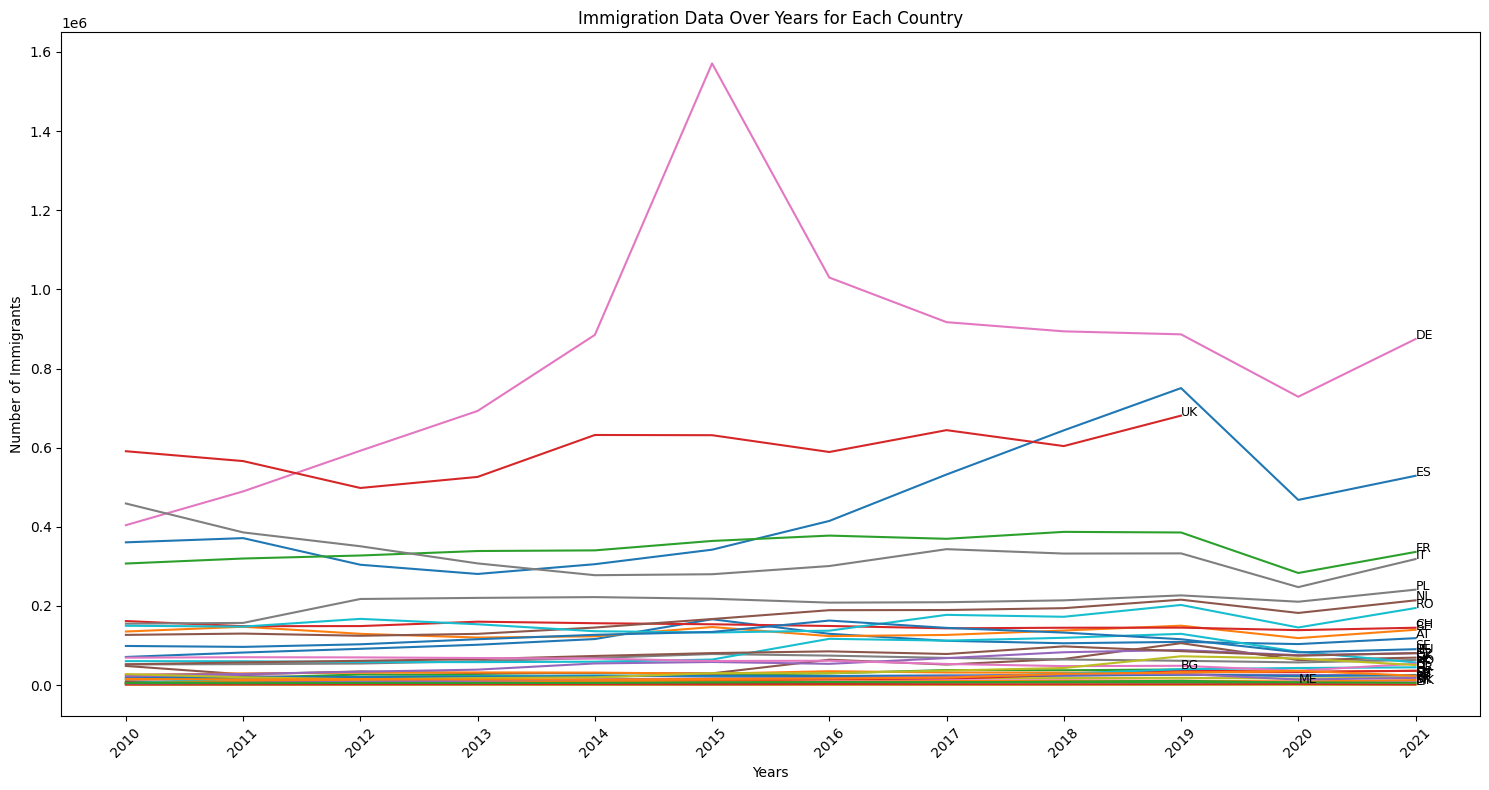

In [18]:
# Function to plot data with country code labels on each line
def plot_data_with_labels(df, title):
    plt.figure(figsize=(15, 8))

    # Convert the column names (years) to strings
    year_columns = df.columns.astype(str)

    # Loop through each country and plot its data
    for country in df.index:
        # Ensure the data is in a float format for plotting and drop NaN values
        country_data = df.loc[country].astype(float).dropna()
        if not country_data.empty:
            plt.plot(year_columns[:len(country_data)], country_data, label=country)
            # Add text label near the last point of each line
            last_year = year_columns[len(country_data) - 1]
            last_value = country_data.iloc[-1]
            plt.text(last_year, last_value, country, fontsize=9)

    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel('Number of Immigrants')
    plt.xlabel('Years')
    plt.tight_layout()
    plt.show()

# Plotting Immigration Data with country labels
plot_data_with_labels(immigration_df_final, 'Immigration Data Over Years for Each Country')


In [21]:
# Define the relative path to the CSV file
hicp_file_path = '../data/average-annual-HICP.csv'

# Read the CSV file
hicp_data = pd.read_csv(hicp_file_path)

# Convert to DataFrame
hicp_df = pd.DataFrame(hicp_data)

In [22]:
# Split the first column and drop the original column
hicp_df[['freq', 'unit', 'coicop', 'country']] = hicp_df['freq,unit,coicop,geo\\TIME_PERIOD'].str.split(',', expand=True)
hicp_df.drop('freq,unit,coicop,geo\\TIME_PERIOD', axis=1, inplace=True)

# Clean the data in the year columns
for col in hicp_df.columns.drop(['freq', 'unit', 'coicop', 'country']):
    hicp_df[col] = hicp_df[col].replace({":": np.nan, ": d": np.nan, " d": ""}, inplace=False, regex=True)
    hicp_df[col] = hicp_df[col].astype(float)

# Set 'country' as the index of the DataFrame
hicp_df_final = hicp_df.drop(['freq', 'unit', 'coicop'], axis=1).set_index('country')

# Display the cleaned DataFrame
hicp_df_final.head()

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
country,,,,,,,,,,,,
AL,NaN,NaN,NaN,NaN,101.51,104.76,106.59,108.39,110.74,113.26,120.69,127.13
AT,95.75,97.77,99.20,100.0,100.97,103.22,105.41,106.98,108.47,111.46,121.07,130.40
BE,97.68,98.90,99.38,100.0,101.77,104.03,106.44,107.77,108.23,111.71,123.26,126.07
BG,102.33,102.72,101.08,100.0,98.68,99.85,102.48,104.99,106.27,109.30,123.52,134.15
CH,100.76,100.83,100.84,100.0,99.47,100.11,101.03,101.41,100.56,101.04,103.74,106.10


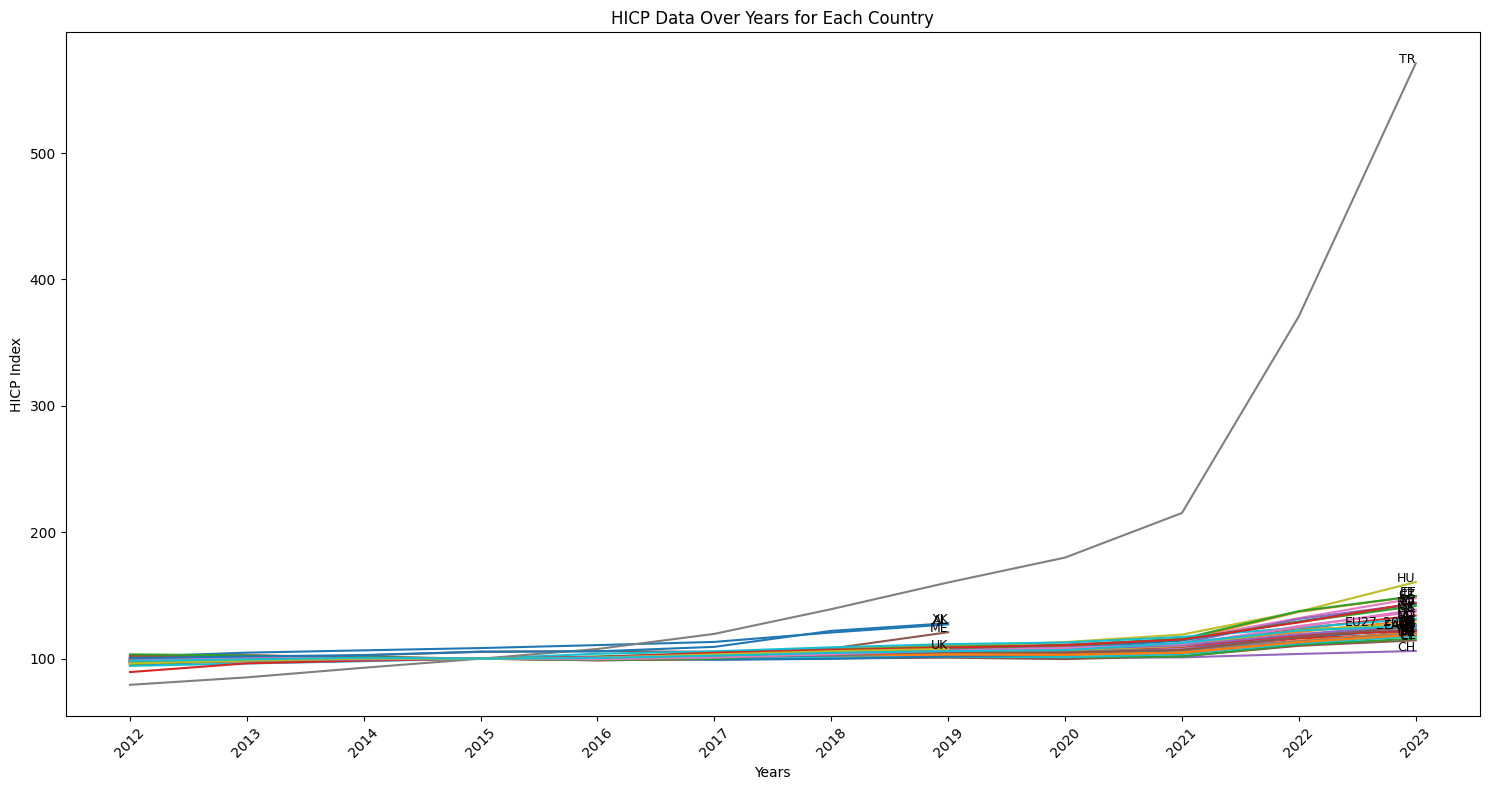

In [23]:
# Function to plot data with country code labels on each line
def plot_data_with_labels(df, title):
    plt.figure(figsize=(15, 8))

    # Convert the column names (years) to strings
    year_columns = df.columns.astype(str)

    # Loop through each country and plot its data
    for country in df.index:
        # Ensure the data is in a float format for plotting and drop NaN values
        country_data = df.loc[country].dropna()
        if not country_data.empty:
            plt.plot(year_columns[:len(country_data)], country_data, label=country)
            # Add text label near the last point of each line
            last_year = year_columns[len(country_data) - 1]
            last_value = country_data.iloc[-1]
            plt.text(last_year, last_value, country, fontsize=9, ha='right')

    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel('HICP Index')
    plt.xlabel('Years')
    plt.tight_layout()
    plt.show()

# Plotting HICP Data with country labels
plot_data_with_labels(hicp_df_final, 'HICP Data Over Years for Each Country')
